### Exploratory Data Analysis.
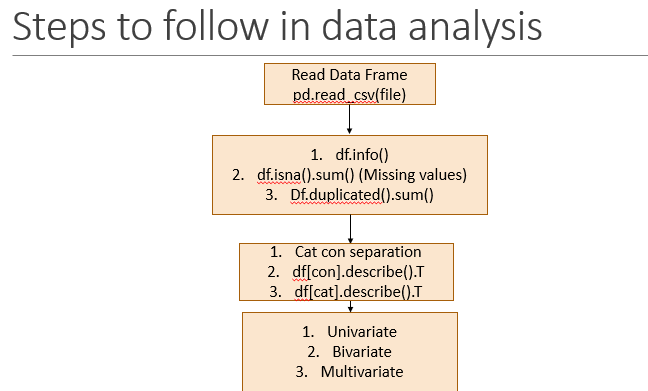

### Step 1 - Data Ingestion 

In [97]:
path = r"C:\Python ETLHIVE\laptopPrice.csv"
print(path)

C:\Python ETLHIVE\laptopPrice.csv


In [98]:
import pandas as pd
df = pd.read_csv(path)

In [99]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


### Step 2 - Perform basic data quality checks.

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [101]:
df.isna().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [102]:
df.duplicated().sum()

21

In [103]:
# Drop the duplicates
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,135990,3 stars,0,0
798,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,144990,3 stars,0,0
799,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,149990,3 stars,0,0
800,ASUS,AMD,Ryzen 9,Not Available,4 GB,DDR4,1024 GB,0 GB,Windows,64-bit,4 GB,Casual,1 year,No,No,142990,3 stars,0,0


In [104]:
df.shape

(802, 19)

### Step 3 - Descriptive Statistics.

In [105]:
df.dtypes

brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
os_bit               object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object

In [106]:
df.columns

Index(['brand', 'processor_brand', 'processor_name', 'processor_gnrtn',
       'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb',
       'weight', 'warranty', 'Touchscreen', 'msoffice', 'Price', 'rating',
       'Number of Ratings', 'Number of Reviews'],
      dtype='object')

In [107]:
cat = list(df.columns[df.dtypes == "object"])
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

In [108]:
con = list(df.columns[df.dtypes != "object"])
con

['Price', 'Number of Ratings', 'Number of Reviews']

In [109]:
df[con].describe().T

,count,mean,std,min,25%,50%,75%,max
Price,802.0,76625.543641,45232.984422,16990.0,45990.0,63990.0,89525.00,441990.0
Number of Ratings,802.0,299.844140,1001.784420,0.0,0.0,17.0,140.25,15279.0
Number of Reviews,802.0,36.089776,118.313553,0.0,0.0,2.0,18.00,1947.0


In [110]:
df[cat].describe().T

,count,unique,top,freq
brand,802,8,ASUS,243
processor_brand,802,3,Intel,594
processor_name,802,11,Core i5,284
processor_gnrtn,802,8,11th,328
ram_gb,802,4,8 GB,404
ram_type,802,6,DDR4,690
ssd,802,7,512 GB,389
hdd,802,4,0 GB,602
os,802,3,Windows,763
os_bit,802,2,64-bit,693


In [111]:
df["brand"].unique()

array(['ASUS', 'Lenovo', 'acer', 'Avita', 'HP', 'DELL', 'MSI', 'APPLE'],
      dtype=object)

In [112]:
df["brand"].value_counts()

ASUS      243
DELL      149
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      23
Avita       6
Name: brand, dtype: int64

### Step 4 - Data Visualization.

1. Univariate.
2. Bivariate.
3. Multivariate.

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns 

### 1. Univariate 

1. Categorical- Countplot.
2. Continous- Histograms.

In [114]:
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

<Axes: xlabel='processor_brand', ylabel='count'>

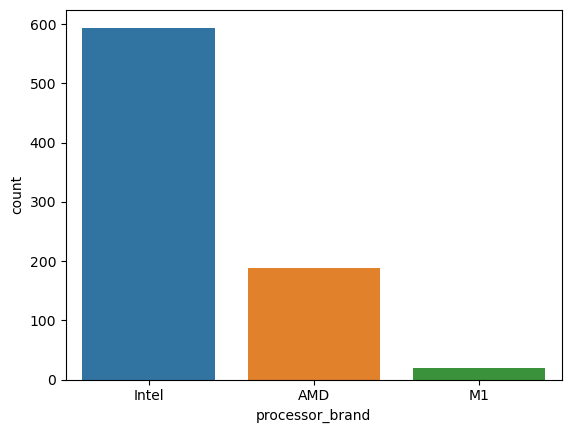

In [115]:
sns.countplot(data=df, x="processor_brand")

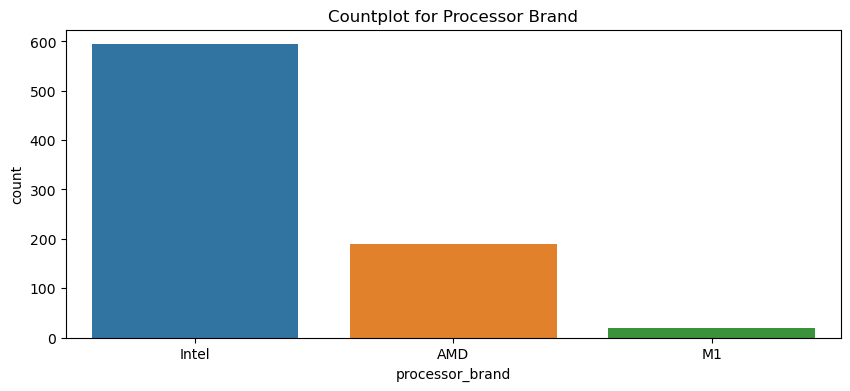

In [116]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="processor_brand") # Plotting the countplot
plt.title("Countplot for Processor Brand") # Add a title
plt.show() # Show the plot

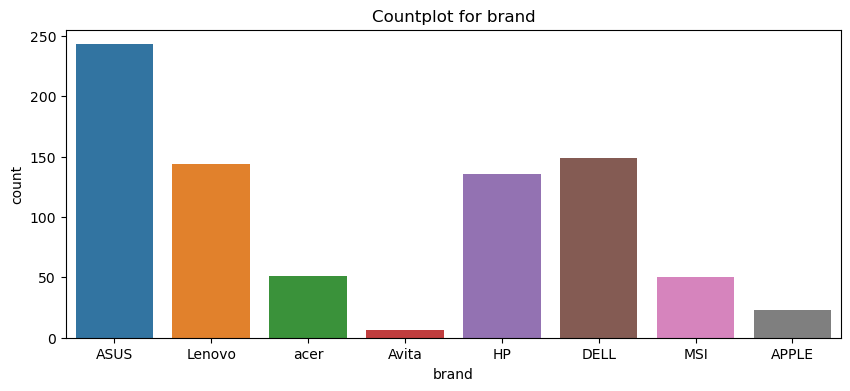

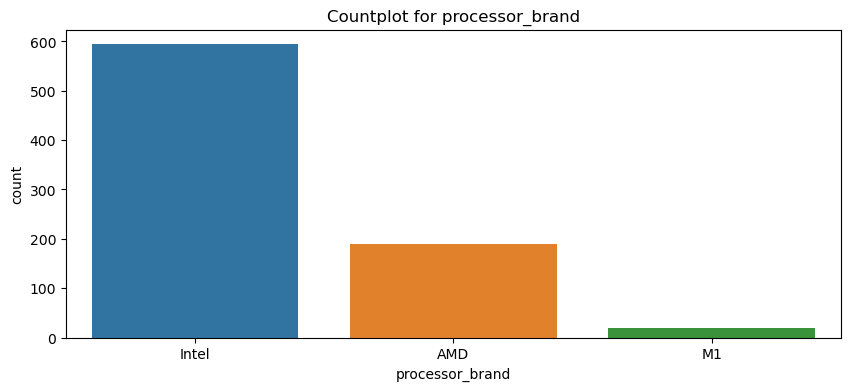

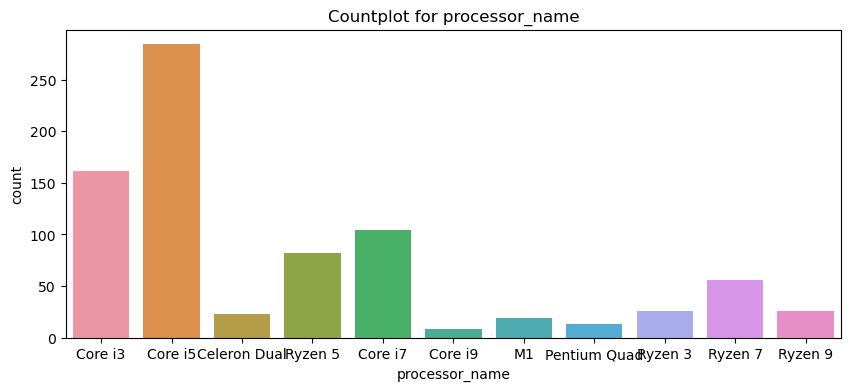

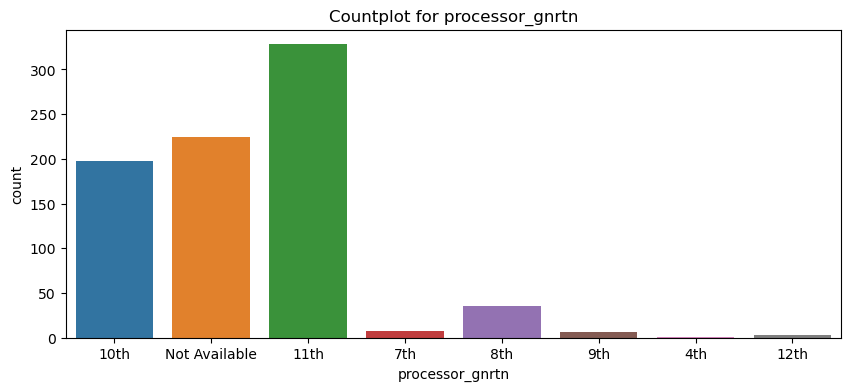

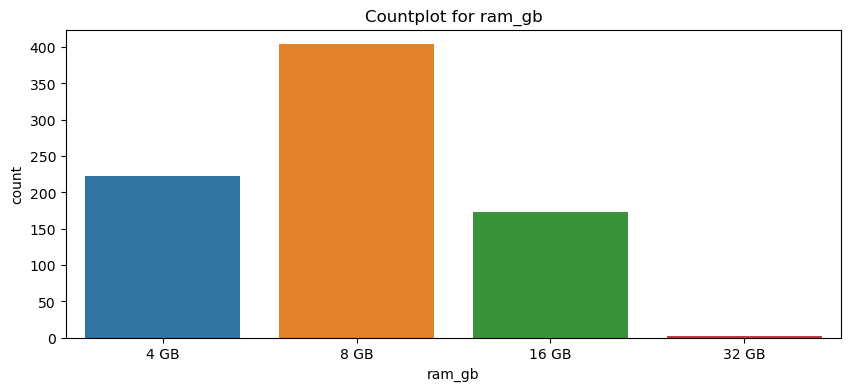

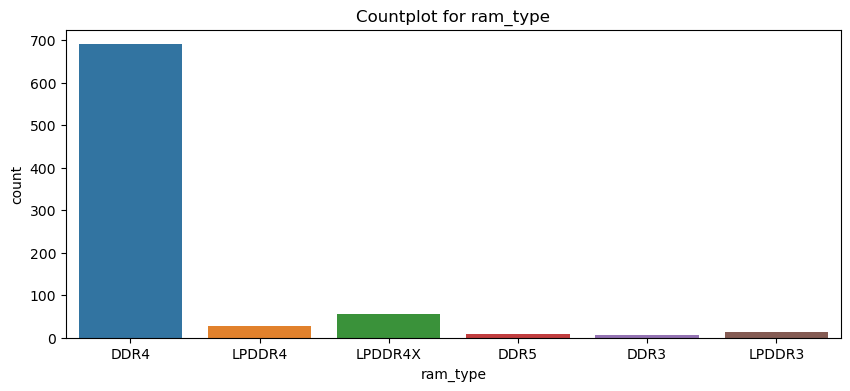

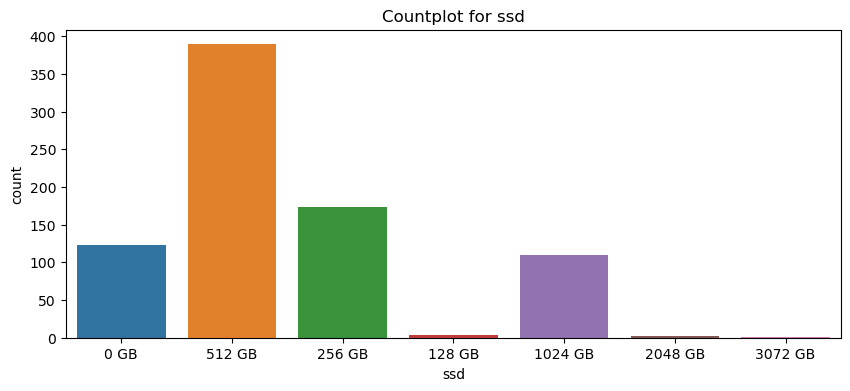

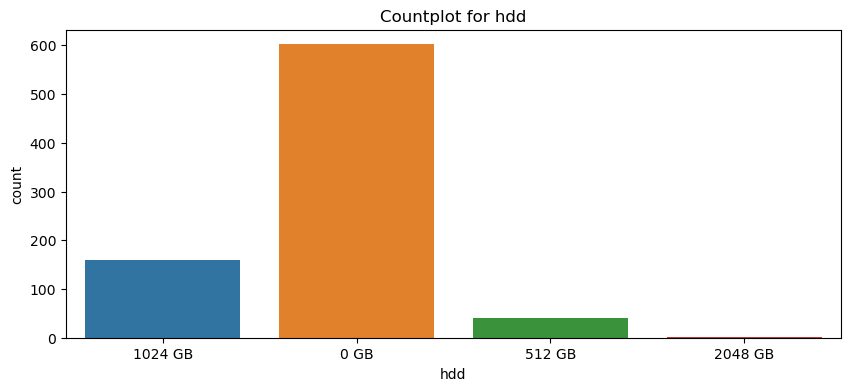

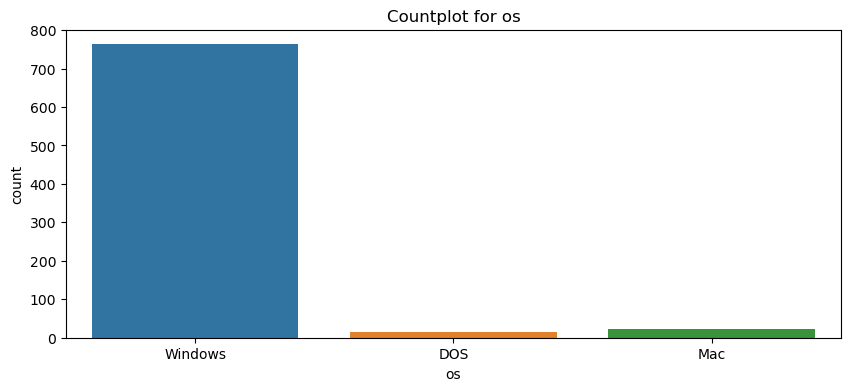

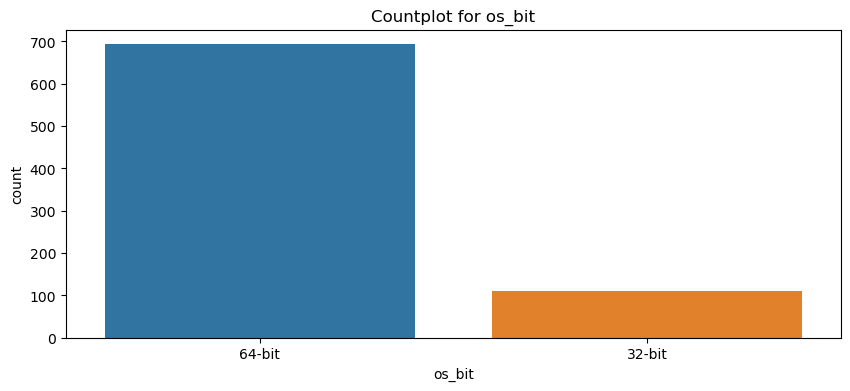

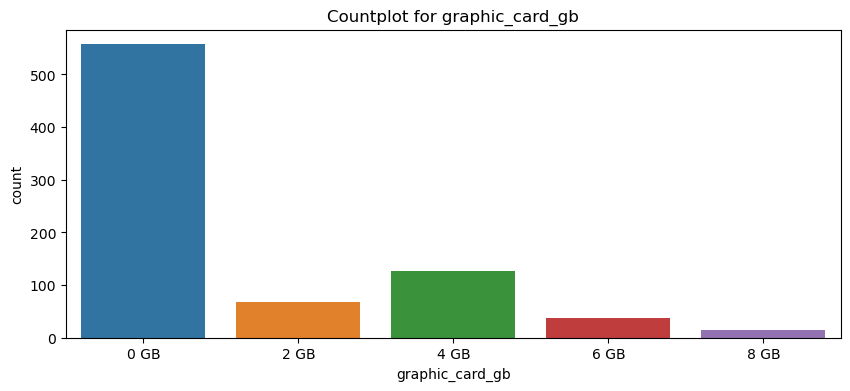

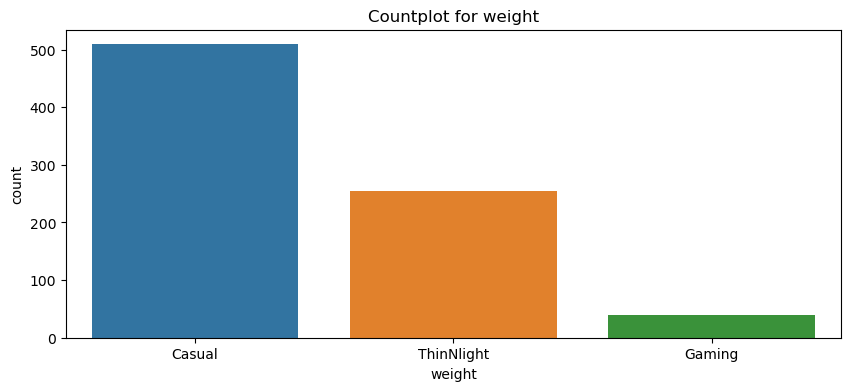

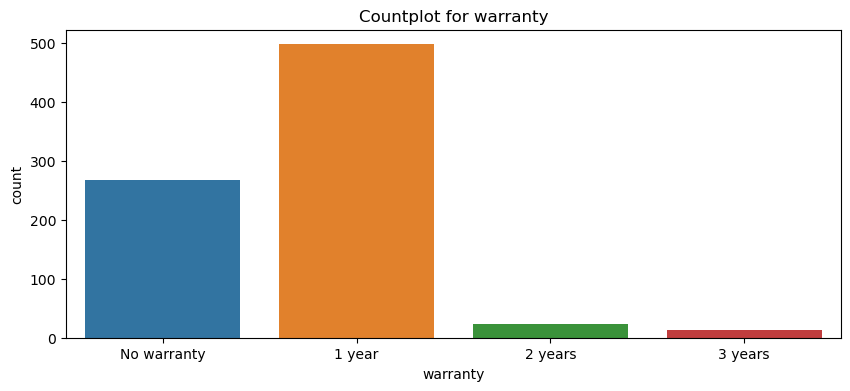

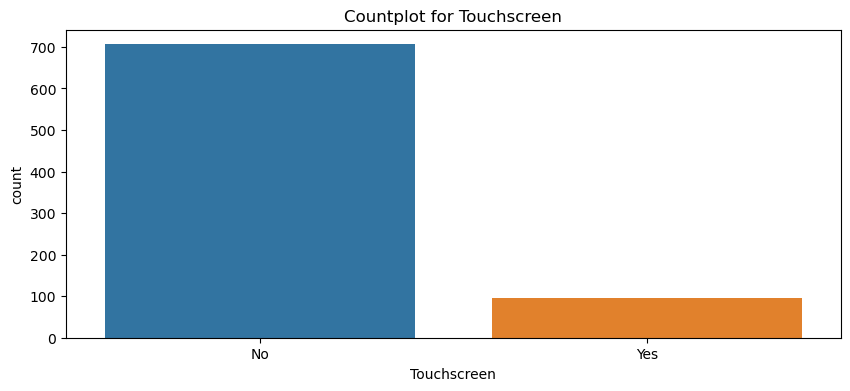

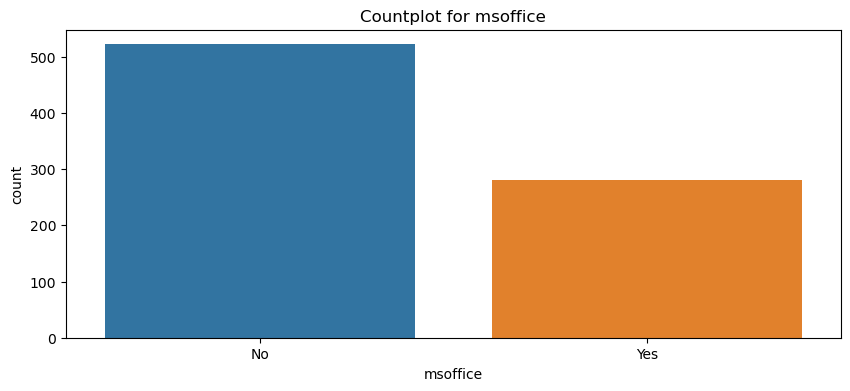

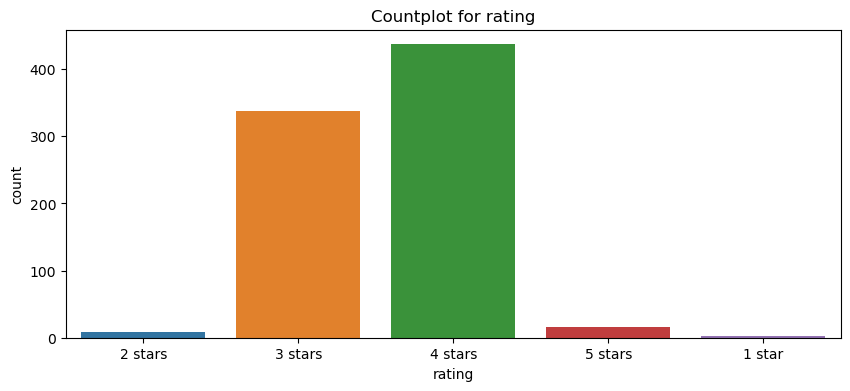

In [117]:
for i in cat:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=i)
    plt.title(f"Countplot for {i}")
    plt.show()

### Histogram - Continous Features. 

In [118]:
con

['Price', 'Number of Ratings', 'Number of Reviews']

<Axes: xlabel='Price', ylabel='Count'>

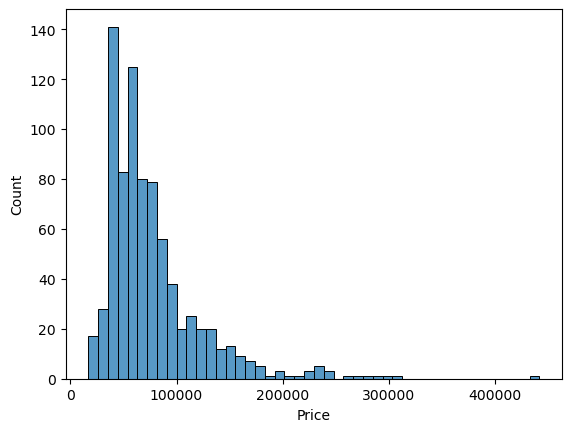

In [119]:
sns.histplot(data=df,x="Price")

### KDE - Kernal Density Estimate.

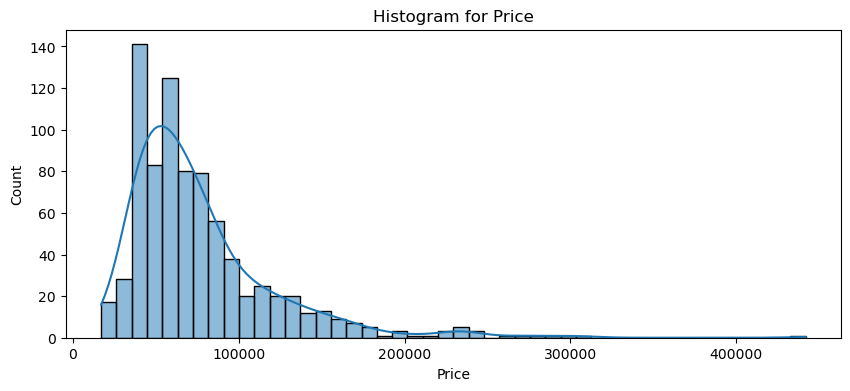

In [120]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x="Price", kde=True)
plt.title("Histogram for Price")
plt.show()

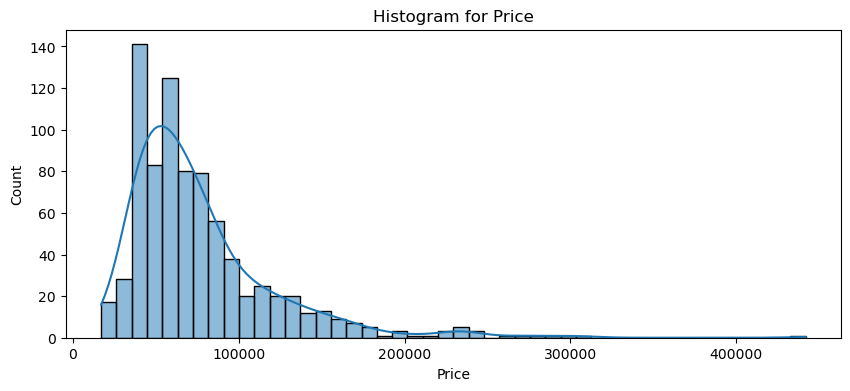

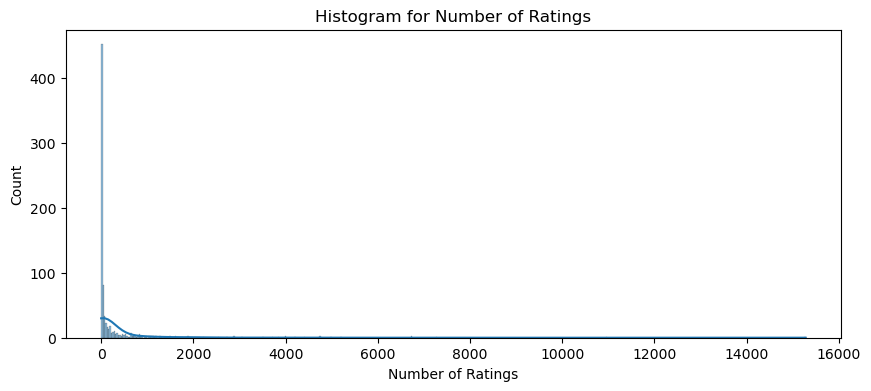

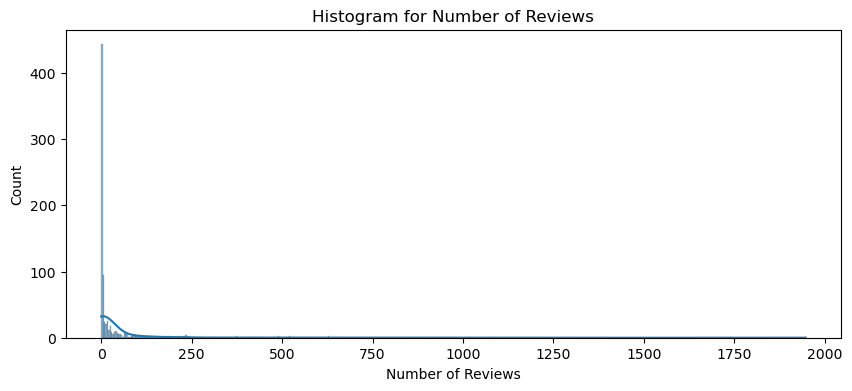

In [121]:
for i in con:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f"Histogram for {i}")
    plt.show()

### Find out average price by brand.

In [122]:
a = df.groupby(by="brand") \
    .agg({"Price":"mean"}) \
    .sort_values(by="Price")
a

,Price
brand,
Avita,56346.500000
DELL,60788.953020
acer,72420.039216
Lenovo,72920.208333
HP,73640.272059
ASUS,79426.020576
MSI,98713.020000
APPLE,157081.304348


In [123]:
type(a)

pandas.core.frame.DataFrame

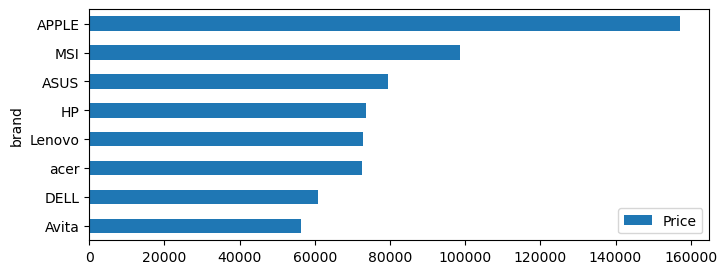

In [124]:
a.plot(kind="barh", figsize=(8, 3))
plt.show()

### 2. Bivariate.  

Continous- Numerical,Categorical - Text analyze Two features Together.

1. Continous vs Continous - Scatterplot,Regplot.
2. Categorical vs Continous - Boxplot.
3. Categorical vs Categorcial - Crosstab.

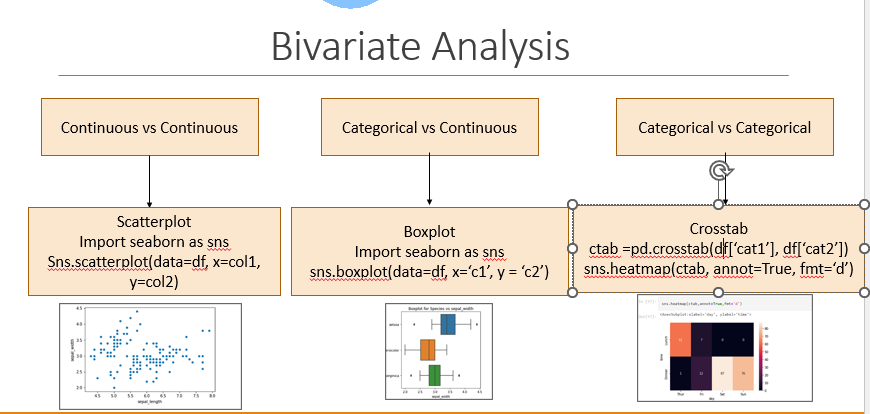

In [125]:
con

['Price', 'Number of Ratings', 'Number of Reviews']

<Axes: xlabel='Number of Ratings', ylabel='Price'>

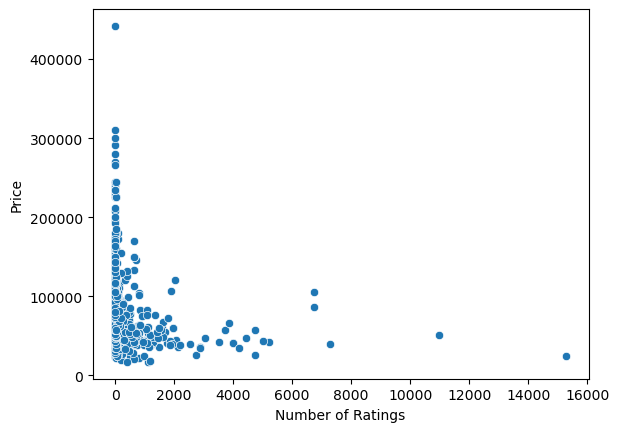

In [126]:
# Price vs Number of ratings
sns.scatterplot(data=df, x="Number of Ratings", y="Price")

### Number of ratings and price are not related.

### Higher the ratings lower the price.

In [127]:
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

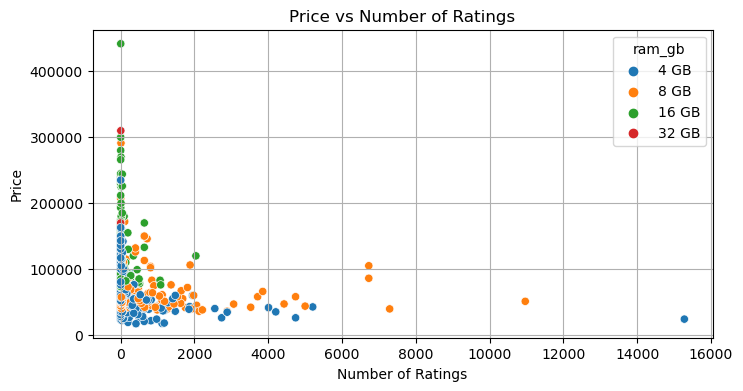

In [128]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x="Number of Ratings", y="Price", hue="ram_gb")
plt.title("Price vs Number of Ratings")
plt.grid()
plt.show()

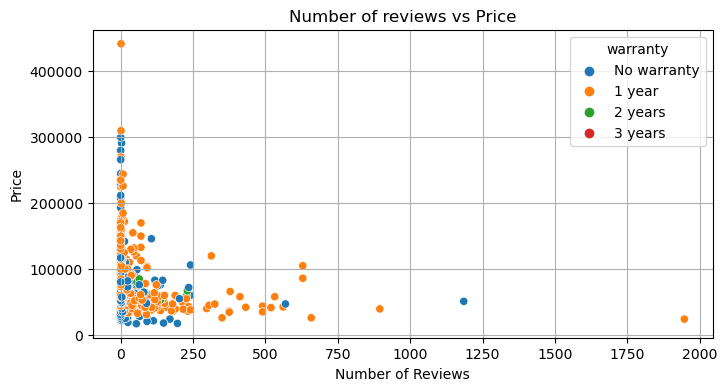

In [129]:
# Number of reviews vs price
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x="Number of Reviews", y="Price", hue="warranty")
plt.title("Number of reviews vs Price")
plt.grid()
plt.show()

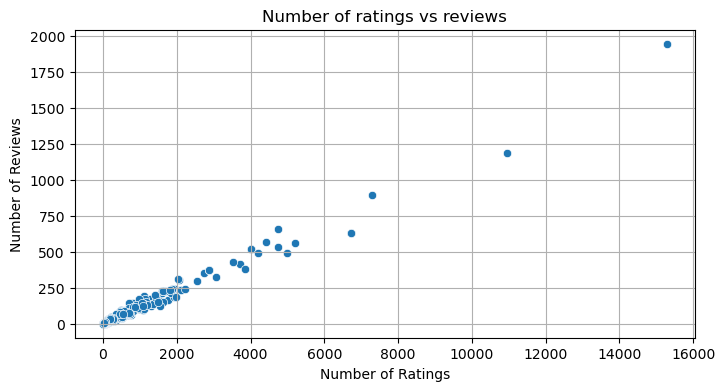

In [130]:
# Number of reviews vs number of ratings
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x="Number of Ratings", y="Number of Reviews")
plt.title("Number of ratings vs reviews")
plt.grid()
plt.show()

### There is linear relationship between number ratings and reviews.

### Regplot.

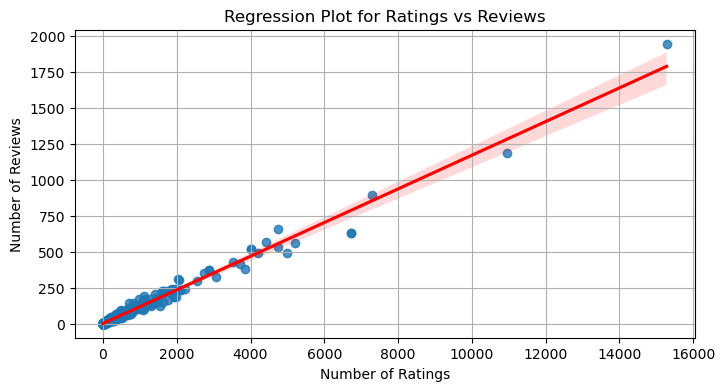

In [131]:
plt.figure(figsize=(8, 4))
sns.regplot(data=df, x="Number of Ratings", y="Number of Reviews", line_kws={"color":"red"})
plt.title("Regression Plot for Ratings vs Reviews")
plt.grid()
plt.show()

### 2. Categorical vs Continous.

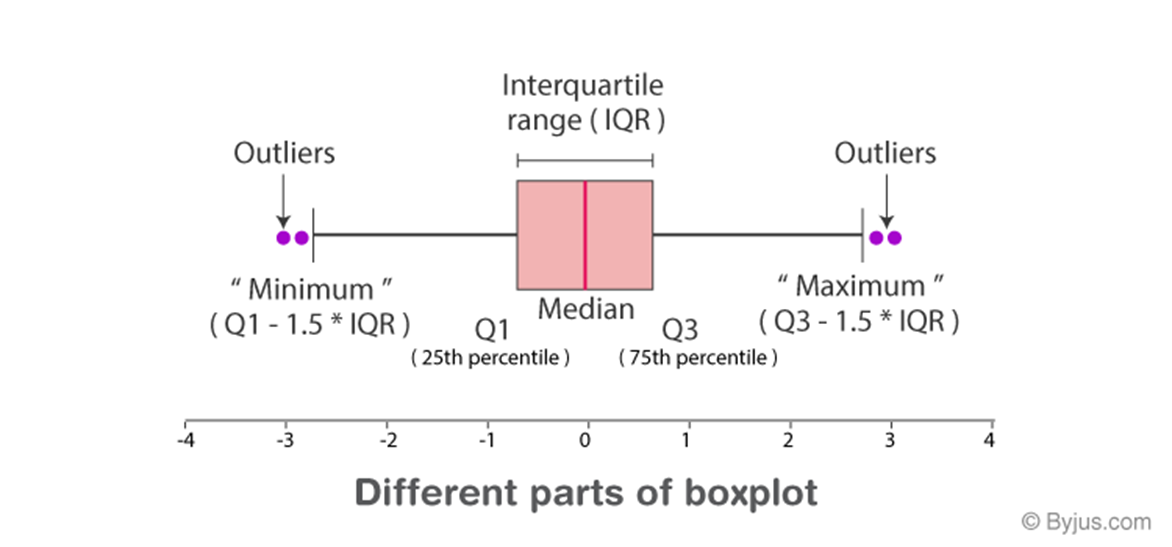

## Boxplot.

In [132]:
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

In [133]:
con

['Price', 'Number of Ratings', 'Number of Reviews']

In [134]:
df["processor_brand"].unique()

array(['Intel', 'AMD', 'M1'], dtype=object)

<Axes: xlabel='processor_brand', ylabel='Price'>

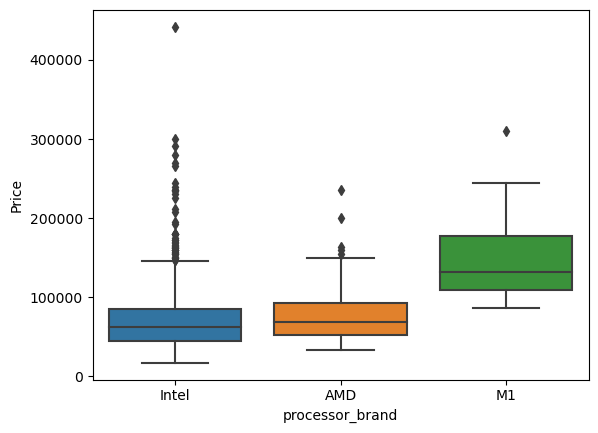

In [135]:
sns.boxplot(data=df, x="processor_brand", y="Price")

### Max = Q3 + 1.5*IQR

### Min = Q1 - 1.5*IQR

### Boxplot for all features with price

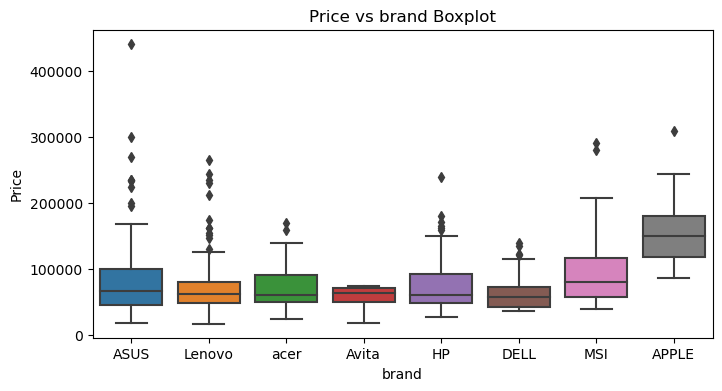

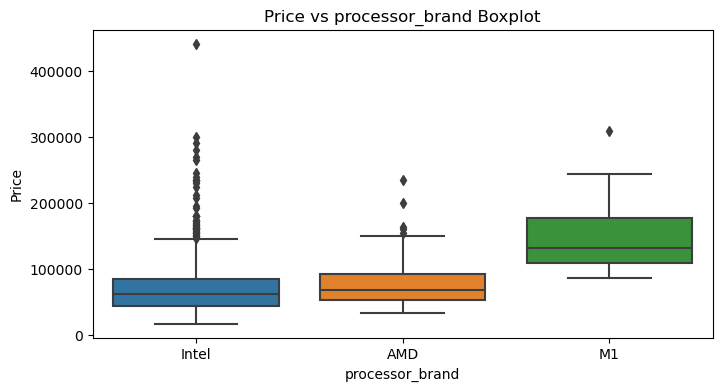

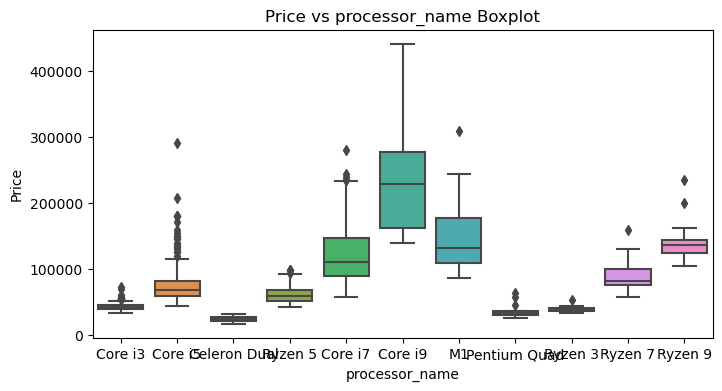

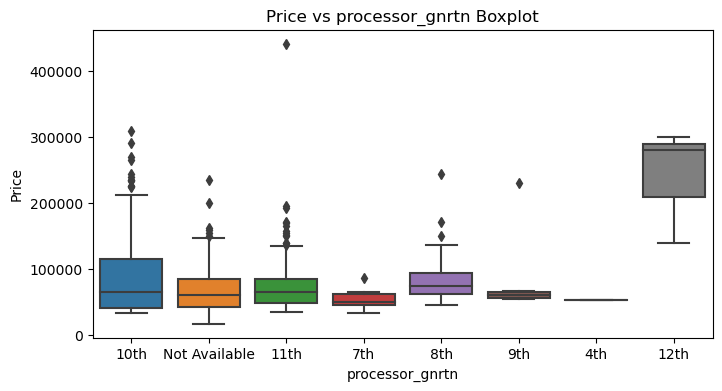

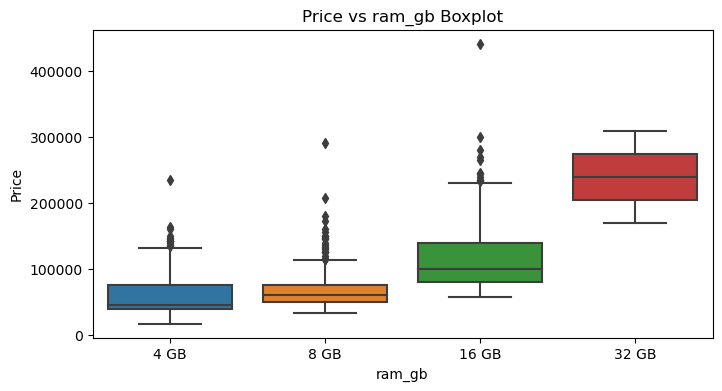

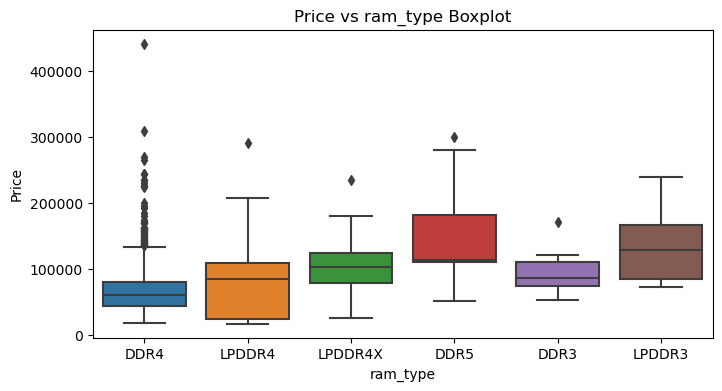

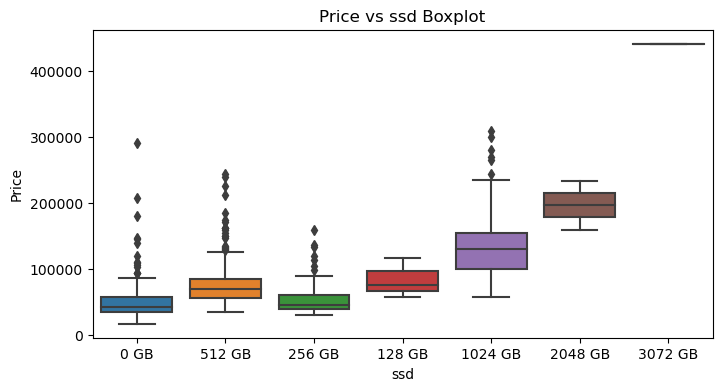

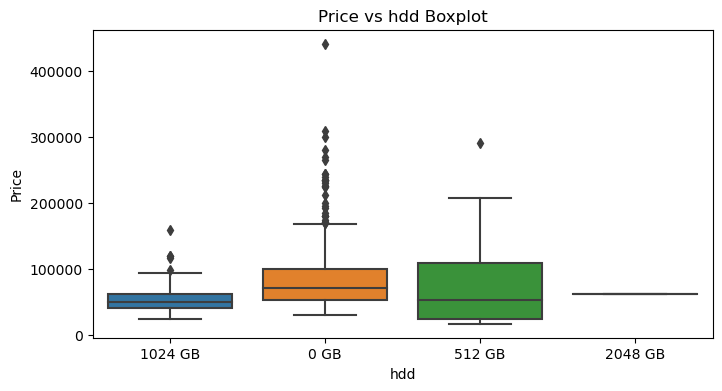

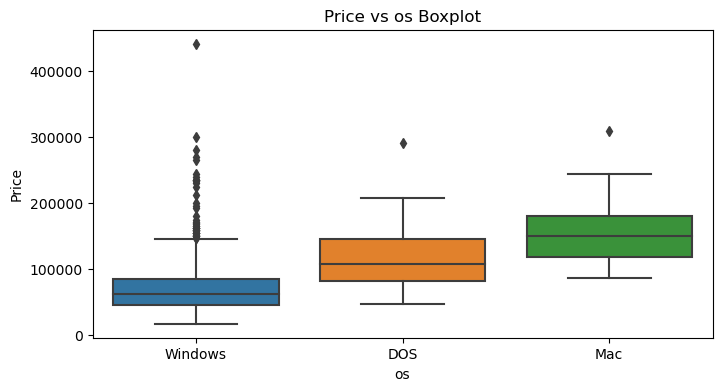

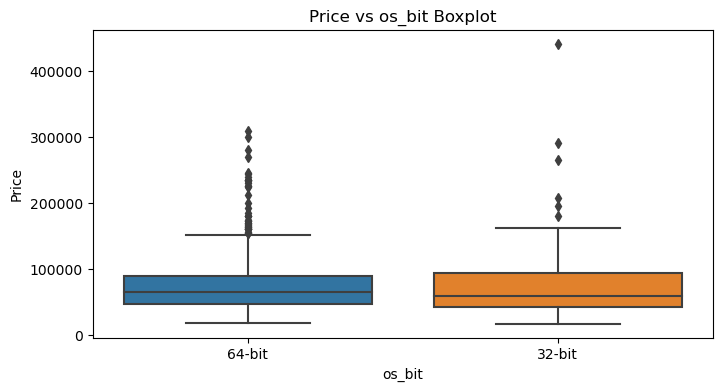

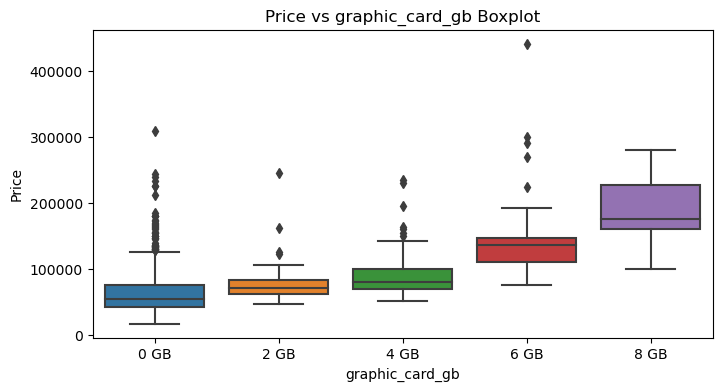

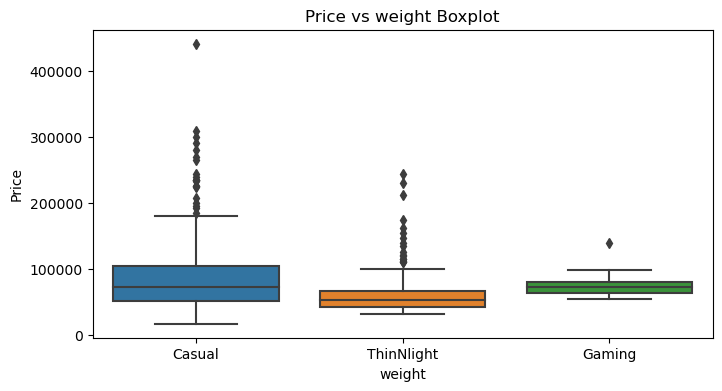

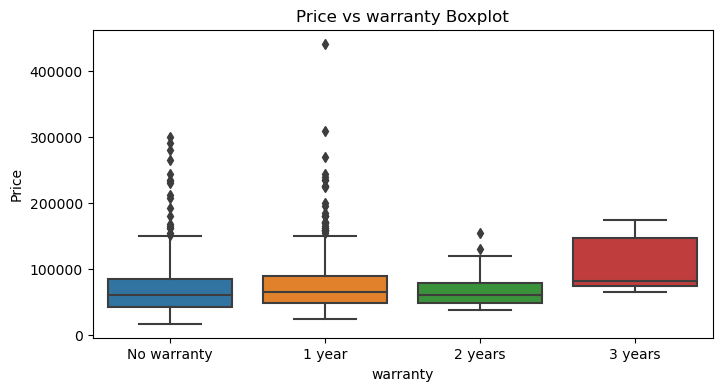

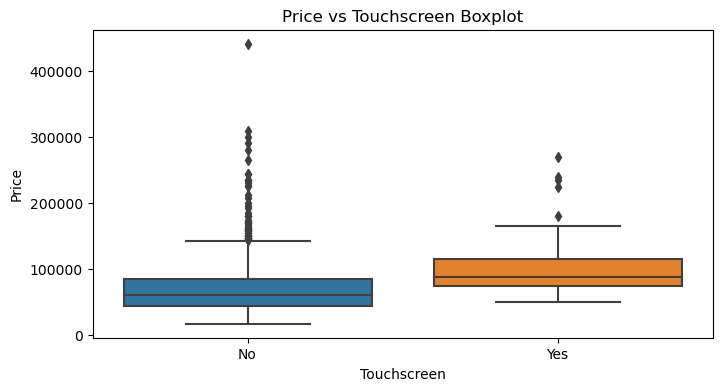

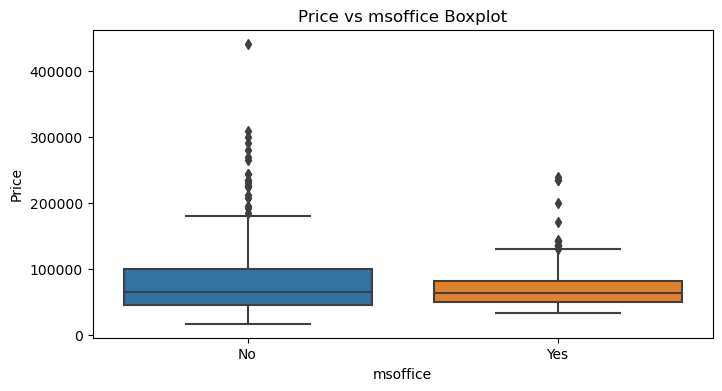

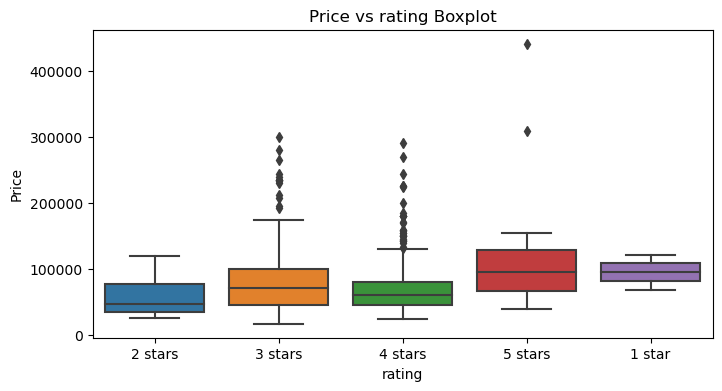

In [136]:
for i in cat:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=i, y="Price")
    plt.title(f"Price vs {i} Boxplot")
    plt.show()

### Categorical Vs Categorical 

## Crosstab Heatmap

In [137]:
cat

['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

In [138]:
len(cat)

16

In [139]:
ctab1 = pd.crosstab(df["ram_gb"],df["ram_type"])
ctab1

ram_type,DDR3,DDR4,DDR5,LPDDR3,LPDDR4,LPDDR4X
ram_gb,,,,,,
16 GB,2,140,2,8,1,20
32 GB,0,2,0,0,0,0
4 GB,0,197,4,0,10,12
8 GB,5,351,2,6,16,24


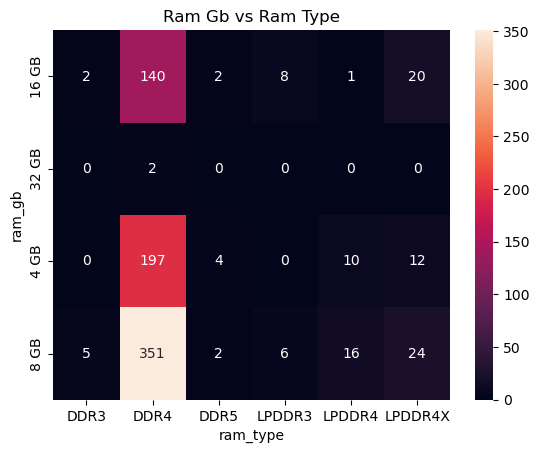

In [140]:
sns.heatmap(data= ctab1,annot=True,fmt="d")
plt.title("Ram Gb vs Ram Type")
plt.show()

In [141]:
ctab2 = pd.crosstab(df["rating"],df["warranty"])
ctab2

warranty,1 year,2 years,3 years,No warranty
rating,,,,
1 star,2,0,0,0
2 stars,3,0,0,6
3 stars,173,3,10,152
4 stars,309,19,3,106
5 stars,11,1,0,4


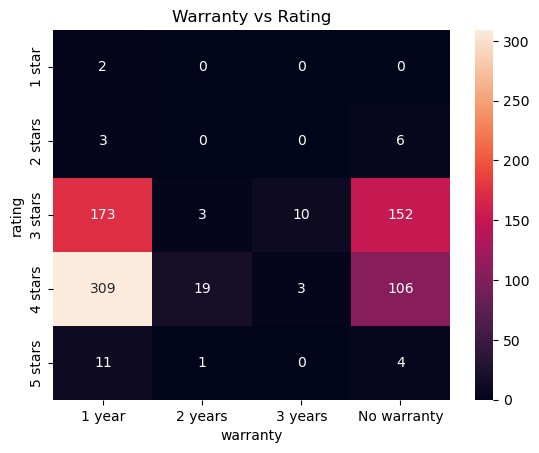

In [142]:
sns.heatmap(data=ctab2,annot=True,fmt="d")
plt.title("Warranty vs Rating")
plt.show()

## 3. Multivariate Analysis.

1. Coorelation.
2. Pairplot.

In [143]:
con

['Price', 'Number of Ratings', 'Number of Reviews']

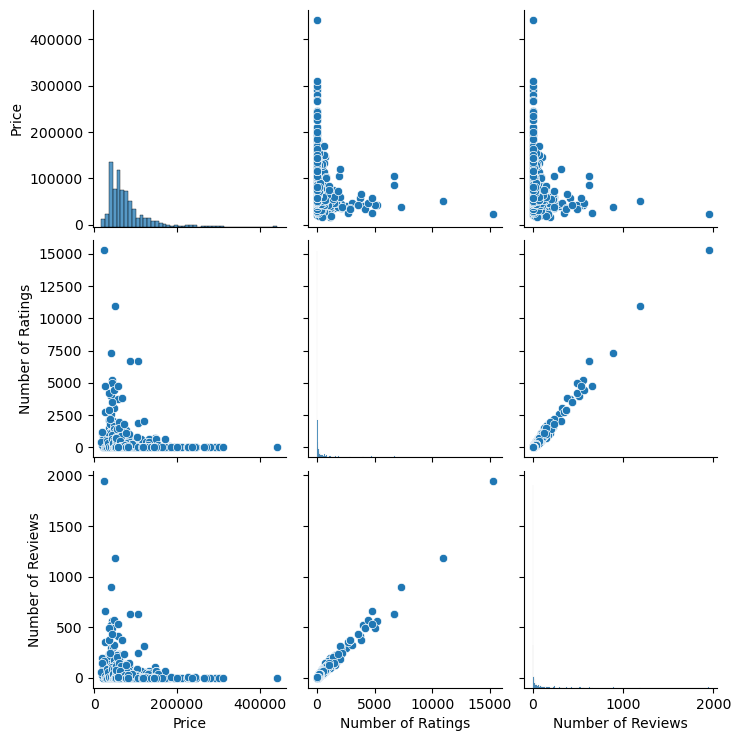

In [144]:
sns.pairplot(data=df)
plt.show()

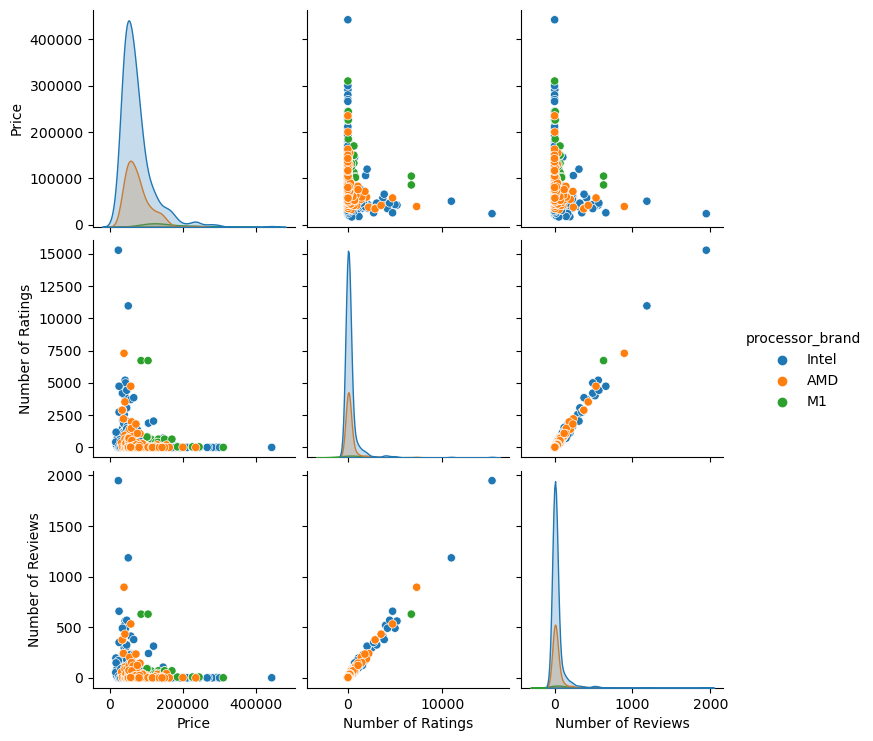

In [145]:
sns.pairplot(data=df,hue="processor_brand")
plt.show()

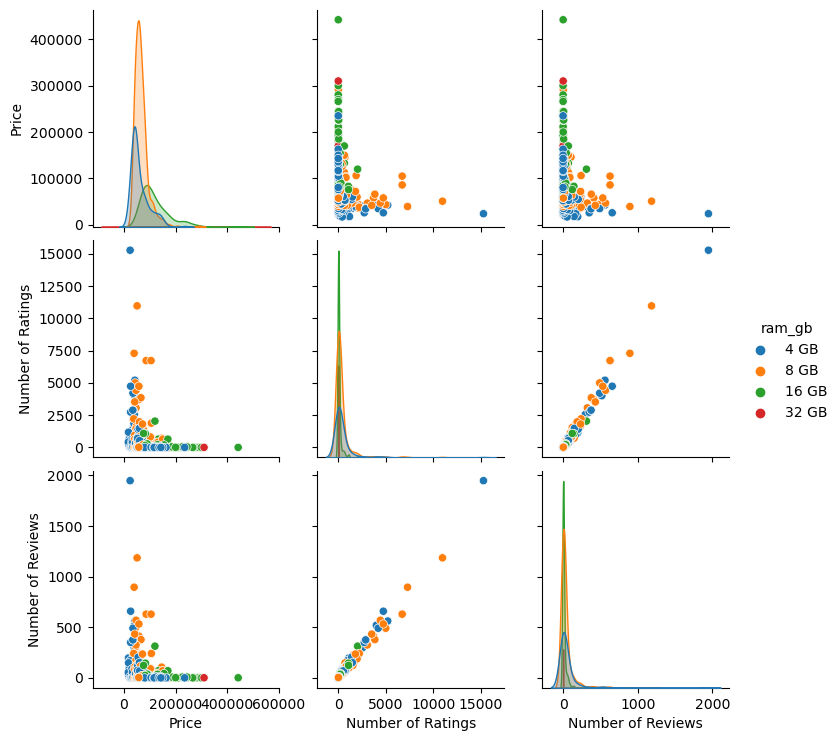

In [147]:
sns.pairplot(data=df,hue="ram_gb")
plt.show()

### Coorelation Heatmap.

In [148]:
c = df.corr(numeric_only=True)

In [149]:
c

,Price,Number of Ratings,Number of Reviews
Price,1.000000,-0.152553,-0.156791
Number of Ratings,-0.152553,1.000000,0.991062
Number of Reviews,-0.156791,0.991062,1.000000


<Axes: >

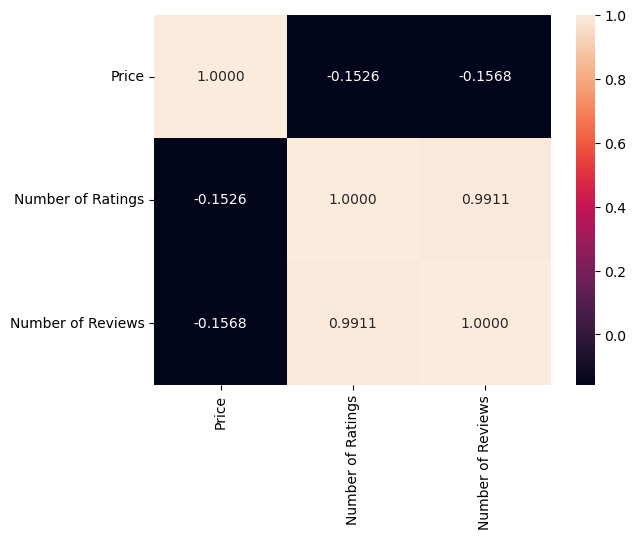

In [150]:
sns.heatmap(data=c,annot=True,fmt=".4f")

### Extra Parts.

### Median Price of the laptop by processor.

In [151]:
b = df.groupby(by="processor_brand")\
    .agg({"Price":"median"})\
    .sort_values(by="Price")
b

,Price
processor_brand,
Intel,61793.5
AMD,68500.0
M1,131990.0


<Axes: ylabel='processor_brand'>

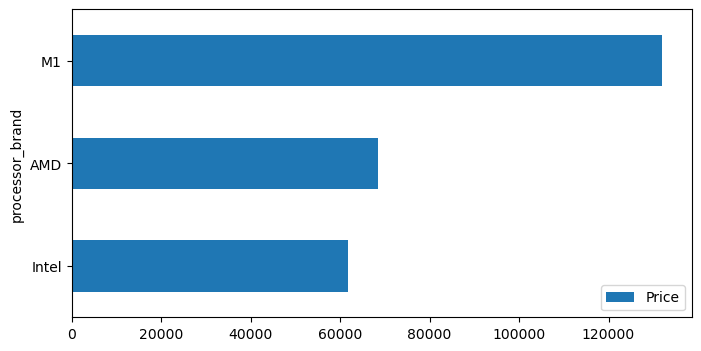

In [152]:
b.plot(kind="barh", figsize=(8, 4))

## Find out average price of laptops by processor_brand and warranty.

In [153]:
d = df.groupby(by = ["processor_brand", "warranty"]) \
    .agg({"Price":"mean"}) \
    .sort_values(by="Price")

In [154]:
d=d.round(2)

In [155]:
d

Price
processor_brand warranty              
Intel           2 years       68945.87
                1 year        73326.99
AMD             No warranty   73547.52
Intel           No warranty   74241.80
AMD             1 year        77824.30
                3 years       78588.00
Intel           3 years      113477.20
M1              1 year       153726.84

<Axes: ylabel='processor_brand,warranty'>

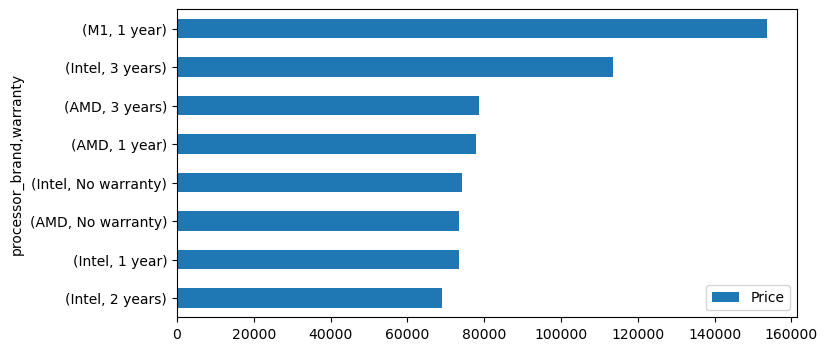

In [156]:
d.plot(kind="barh", figsize=(8, 4))

In [157]:
g = pd.pivot_table(
    data= df,
    values = "Price",
    index = "processor_brand",
    columns= "warranty",
    aggfunc= "mean"
)

In [160]:
g=g.round(2)
g

warranty,1 year,2 years,3 years,No warranty
processor_brand,,,,
AMD,77824.30,NaN,78588.0,73547.52
Intel,73326.99,68945.87,113477.2,74241.80
M1,153726.84,NaN,NaN,NaN


<Axes: ylabel='processor_brand'>

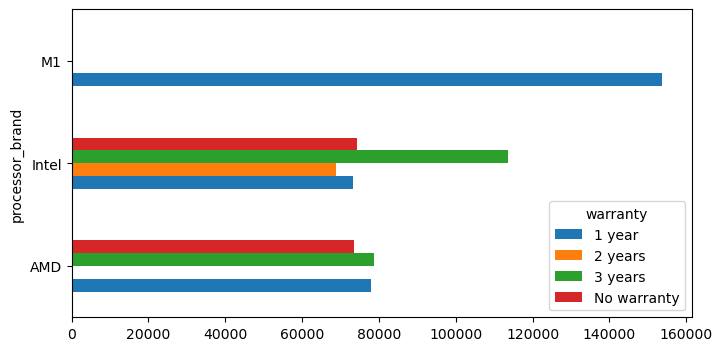

In [161]:
g.plot(kind="barh", figsize=(8, 4))

### For Quick EDA .

In [164]:
%pip install ydata-profiling

In [165]:
from ydata_profiling import ProfileReport

In [166]:
profile = ProfileReport(df,title="Laptop prices report")

In [168]:
import os 
path3 = r"C:\Reports"
os.chdir(path3)

In [169]:
profile.to_file("laptop_report.html")

C:\Users\Hp\.matplotlib\Lib\site-packages\ydata_profiling\profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]